In [1]:
import pandas as pd
import sqlite3

C:\Users\Elena\Desktop\sandbox\ve\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Elena\Desktop\sandbox\ve\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Elena\Desktop\sandbox\ve\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from datetime import datetime, date, time

In [3]:
df = pd.read_csv("powerconsumption.csv")

In [4]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
#изменение формата даты с object на datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
#Добавление  колонок - дата и время. сумма потребления электроэнергии
df['date'] = [d.date() for d in df['Datetime']]
df['time'] = [d.time() for d in df['Datetime']]
df['PC_Sum']=df["PowerConsumption_Zone1"]+df["PowerConsumption_Zone2"]+df["PowerConsumption_Zone3"]

In [8]:
df.head(3)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,date,time,PC_Sum
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00,67803.22193


In [63]:
connector = sqlite3.connect('powerconsumption.db')

In [64]:
cursor = connector.cursor()

In [31]:
#df.to_sql('df', connector)

ValueError: Table 'df' already exists.

In [65]:
connector

In [66]:
sql_agg = """SELECT "time",
    round(AVG(Temperature),2) AS mean_temp,
    min(Temperature) AS min_temp,
    max(Temperature) AS max_temp,
    round(AVG(PC_Sum),5) AS mean_PC,
    avg(PC_Sum) OVER(PARTITION BY "date") AS mean_PC_date,
    min(PC_Sum) AS min_PC,
    min(PC_Sum) OVER(PARTITION BY "date") AS min_PC_date, 
    max(PC_Sum) AS max_PC,
    max (PC_Sum) OVER(PARTITION BY "date") AS max_PC_date      
FROM df
GROUP BY "time"
ORDER BY "time"
"""

In [67]:
cursor.execute(sql_agg)

In [49]:
for row in cursor:
    print(row)

('00:00:00.000000', 17.53, 5.75, 28.68, 71972.24088, 86081.58167915256, 58477.211, 63164.68228, 103937.3749, 108743.08411)
('00:10:00.000000', 17.48, 5.648, 28.6, 70511.82559, 86081.58167915256, 57569.36196, 63164.68228, 102295.48432, 108743.08411)
('00:20:00.000000', 17.44, 5.611, 28.34, 69132.42743, 86081.58167915256, 56528.941430000006, 63164.68228, 100845.32731, 108743.08411)
('00:30:00.000000', 17.39, 5.557, 28.13, 67803.09618, 96975.6949, 55436.65482, 95024.04615, 98830.59108, 98830.59108)
('00:40:00.000000', 17.35, 5.361, 27.86, 66582.81164, 96975.6949, 54328.213489999995, 95024.04615, 97720.25712, 98830.59108)
('00:50:00.000000', 17.31, 5.138, 27.77, 65396.78868, 96975.6949, 53173.674250000004, 95024.04615, 96327.88524999999, 98830.59108)
('01:00:00.000000', 17.27, 5.053, 27.88, 64285.05219, 96975.6949, 52280.382840000006, 95024.04615, 95024.04615, 98830.59108)
('01:10:00.000000', 17.24, 5.235, 27.96, 63358.39089, 94970.36032875, 51425.535304, 93897.31007, 94434.85806000001, 96

In [68]:
connector.commit()

In [69]:
sql_agg

'SELECT "time",\n    round(AVG(Temperature),2) AS mean_temp,\n    min(Temperature) AS min_temp,\n    max(Temperature) AS max_temp,\n    round(AVG(PC_Sum),5) AS mean_PC,\n    avg(PC_Sum) OVER(PARTITION BY "date") AS mean_PC_date,\n    min(PC_Sum) AS min_PC,\n    min(PC_Sum) OVER(PARTITION BY "date") AS min_PC_date, \n    max(PC_Sum) AS max_PC,\n    max (PC_Sum) OVER(PARTITION BY "date") AS max_PC_date      \nFROM df\nGROUP BY "time"\nORDER BY "time"\n'

In [70]:
sql_=cursor.fetchall()

In [71]:
#connector.close()

In [72]:
df_sql = pd.DataFrame(sql_)
df_sql

,0,1,2,3,4,5,6,7,8,9
0,00:00:00.000000,17.53,5.750,28.68,71972.24088,86081.581679,58477.21100,63164.68228,103937.37490,108743.08411
1,00:10:00.000000,17.48,5.648,28.60,70511.82559,86081.581679,57569.36196,63164.68228,102295.48432,108743.08411
2,00:20:00.000000,17.44,5.611,28.34,69132.42743,86081.581679,56528.94143,63164.68228,100845.32731,108743.08411
3,00:30:00.000000,17.39,5.557,28.13,67803.09618,96975.694900,55436.65482,95024.04615,98830.59108,98830.59108
4,00:40:00.000000,17.35,5.361,27.86,66582.81164,96975.694900,54328.21349,95024.04615,97720.25712,98830.59108
...,...,...,...,...,...,...,...,...,...,...
139,23:10:00.000000,17.78,6.795,29.63,80491.18375,112961.359092,65665.90332,102025.01471,115314.27524,134208.14595
140,23:20:00.000000,17.73,6.358,29.35,78729.59850,112961.359092,64538.79678,102025.01471,112340.85825,134208.14595
141,23:30:00.000000,17.69,6.479,28.89,76973.95401,112961.359092,61334.99834,102025.01471,110853.34923,134208.14595
142,23:40:00.000000,17.63,6.472,28.68,75311.47368,112961.359092,60735.69269,102025.01471,109258.38047,134208.14595


In [73]:
df_sql = df_sql.rename(columns={
    0: "time",
    1: "mean_temp",
    2: "min_temp",
    3: "max_temp",
    4: "mean_PC",
    5: "mean_PC_date",
    6: "min_PC",
    7: "min_PC_date",
    8:"max_PC",
    9:"max_PC_date"
})
    

In [74]:
df_sql.head()

,time,mean_temp,min_temp,max_temp,mean_PC,mean_PC_date,min_PC,min_PC_date,max_PC,max_PC_date
0,00:00:00.000000,17.53,5.750,28.68,71972.24088,86081.581679,58477.21100,63164.68228,103937.37490,108743.08411
1,00:10:00.000000,17.48,5.648,28.60,70511.82559,86081.581679,57569.36196,63164.68228,102295.48432,108743.08411
2,00:20:00.000000,17.44,5.611,28.34,69132.42743,86081.581679,56528.94143,63164.68228,100845.32731,108743.08411
3,00:30:00.000000,17.39,5.557,28.13,67803.09618,96975.694900,55436.65482,95024.04615,98830.59108,98830.59108
4,00:40:00.000000,17.35,5.361,27.86,66582.81164,96975.694900,54328.21349,95024.04615,97720.25712,98830.59108


In [75]:
df_sql.to_csv('sql_agg_powerconsumption.csv')

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

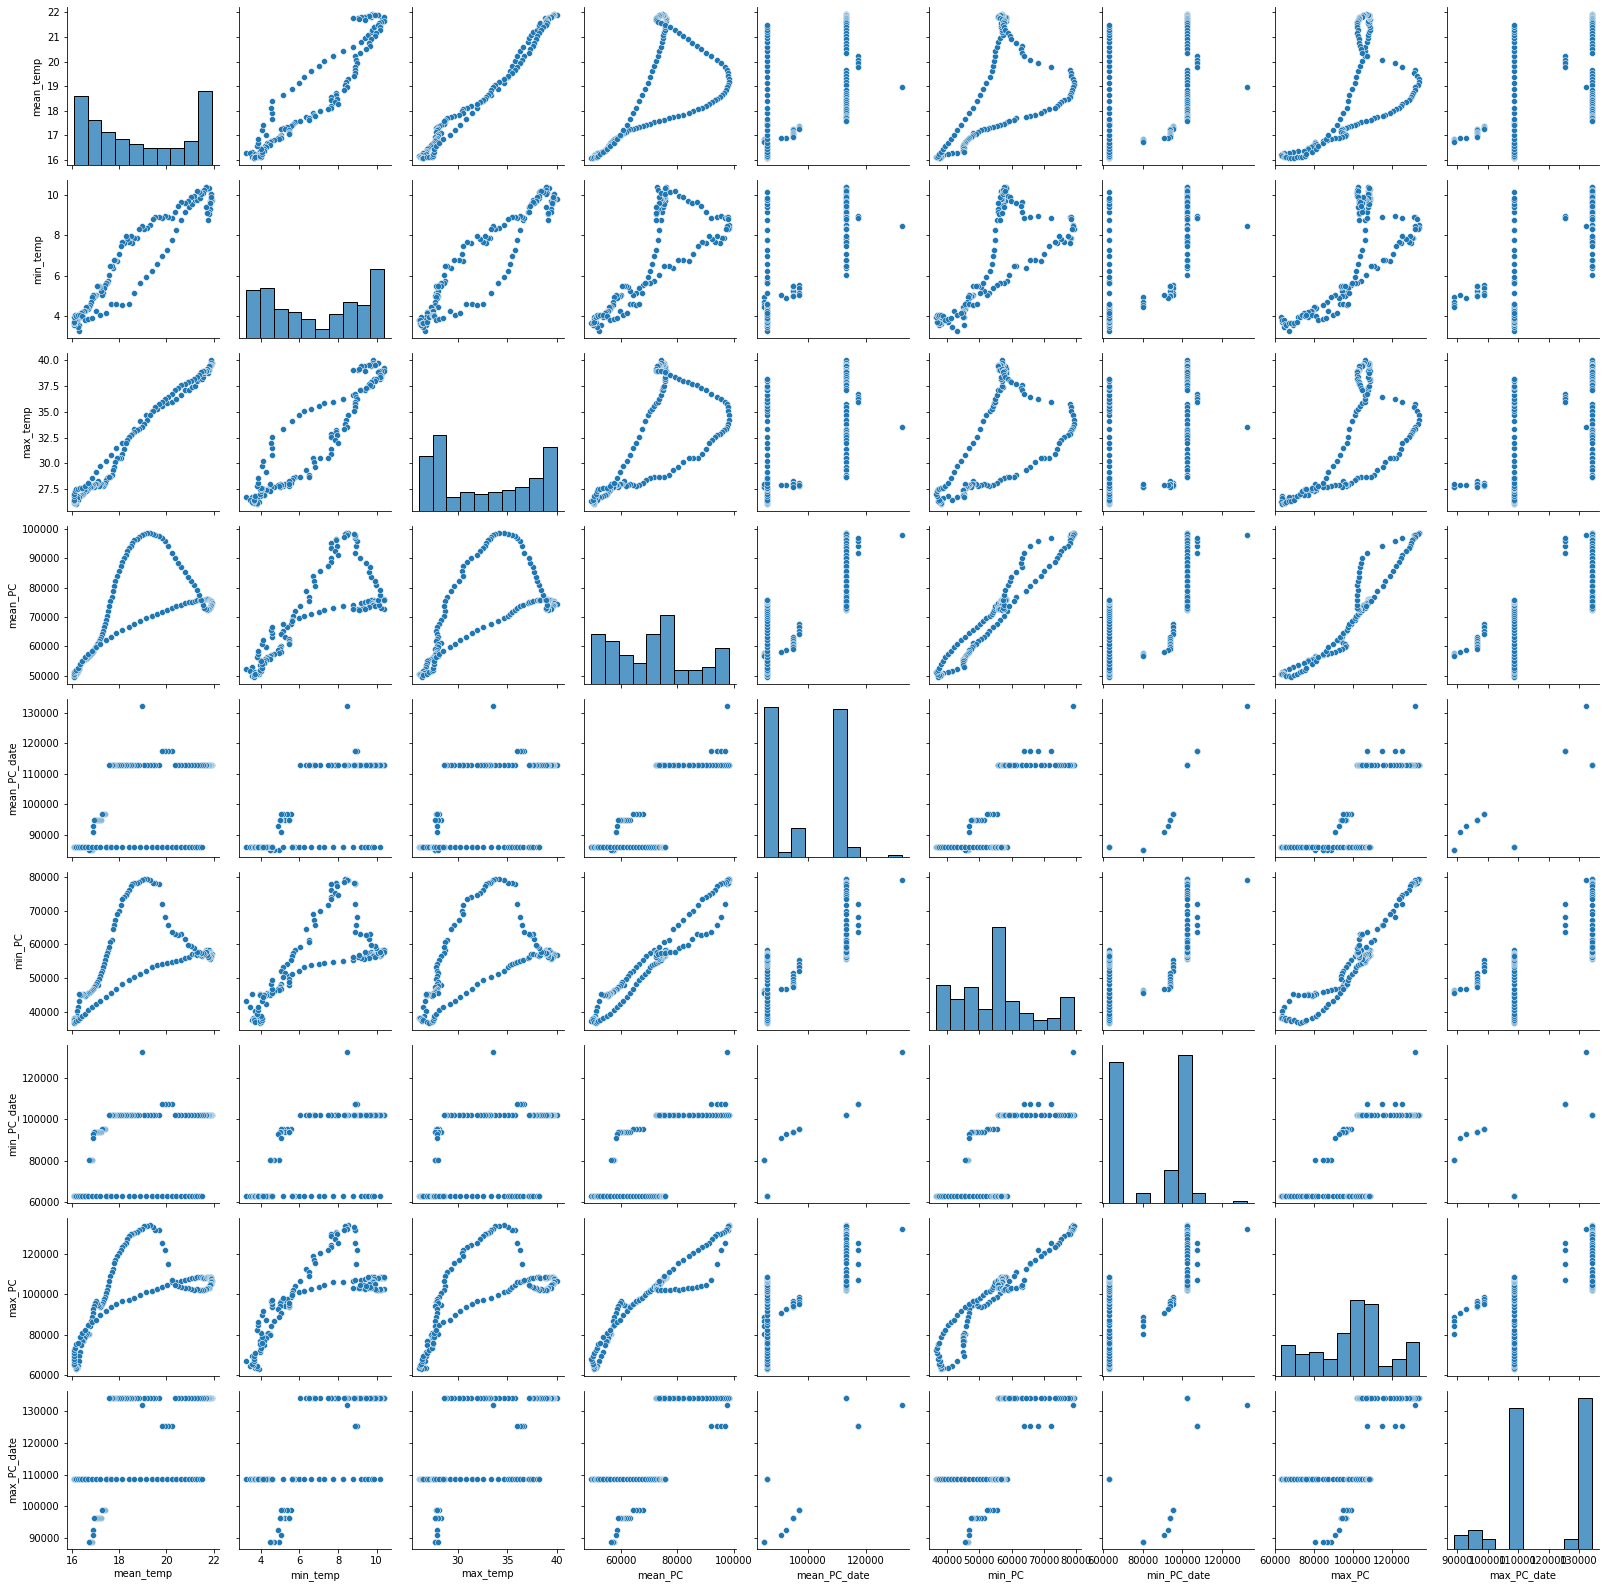

In [77]:
g=sns.PairGrid(df_sql)
g.map_diag(sns.histplot, bins = 10)
g.map_offdiag(sns.scatterplot)

<AxesSubplot:ylabel='PC_Sum'>

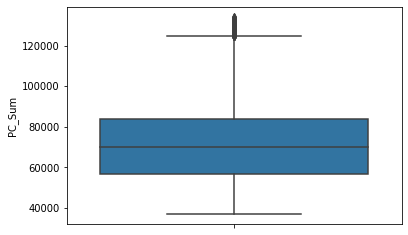

In [78]:
sns.boxplot(y=df['PC_Sum'])